In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import os
import numpy as np
import cv2

In [2]:
dir = 'C:\\Users\\HP\\anaconda3\\Research_Papaya\\Untouch_DataSet_1\\Input_DataSet'

categories = ['anthracnose_1','black_spot_1','phytophthora_1','powdery_mildew_1','ring_spot_1']
data = []

for category in categories:
    path = os.path.join(dir,category)
    label= categories.index(category) 
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        papaya_img=cv2.imread(imgpath,0)
        try:
            papaya_img=cv2.resize(papaya_img,(50,50))
            image = np.array(papaya_img).flatten()
        
            data.append([image,label])
        except Exception as e:
            pass
        
        
print(len(data))

54462


In [3]:
import pickle
import random
from sklearn.model_selection import train_test_split


pick_in=open('LR.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [5]:
pick_in=open('LR.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [7]:
from sklearn.linear_model import LogisticRegression

features = []
labels = []
random.shuffle(data)

for feature, label in data:
    features.append(feature)
    labels.append(label)

    
xtrain, xtest, ytrain, ytest = train_test_split(features,labels, test_size = 0.98)
model = LogisticRegression()
model.fit(xtrain, ytrain)

pick = open('linear.sav','wb')
pickle.dump(model,pick)
pick.close()

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:   0.24992037172353063
Prediction is  :  phytophthora_1


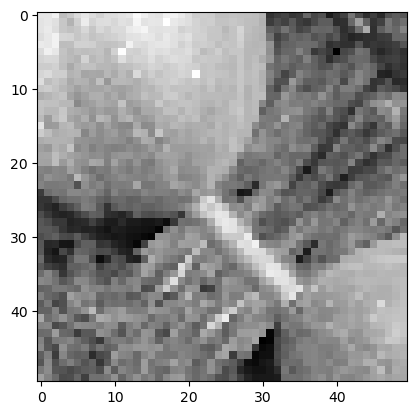

In [8]:
pick = open('linear.sav','rb')
model = pickle.load(pick)
pick.close()

prediction=model.predict(xtest)
accuracy = model.score(xtest, ytest)

categories = ['anthracnose_1','black_spot_1','phytophthora_1','powdery_mildew_1','ring_spot_1']

print('Accuracy:  ', accuracy)
print('Prediction is  : ',categories[prediction[0]])


mypapaya=xtest[0].reshape(50,50)
plt.imshow(mypapaya,cmap='gray')
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
cm

array([[ 652, 1570, 1484, 1810, 1020],
       [1268, 3211, 2903, 2909, 1801],
       [1323, 2481, 3327, 2404, 1709],
       [1638, 4180, 3616, 5047, 2323],
       [ 616, 1591, 1493, 1895, 1102]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

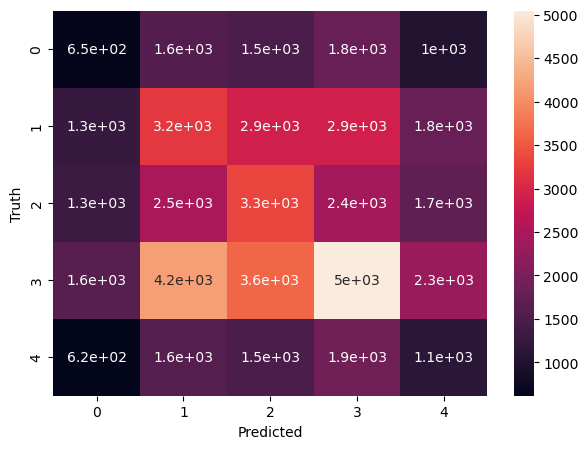

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.10      0.11      6536
           1       0.25      0.27      0.26     12092
           2       0.26      0.30      0.28     11244
           3       0.36      0.30      0.33     16804
           4       0.14      0.16      0.15      6697

    accuracy                           0.25     53373
   macro avg       0.22      0.23      0.22     53373
weighted avg       0.26      0.25      0.25     53373

